# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import os
import csv
import gmaps
import datetime
import pytz
from datetime import datetime, timedelta
 
Current_Date = datetime.now().strftime ('%d-%b-%Y %H:%M:%S')

from pprint import pprint

# Import API key
from api_keys import api_key, g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

14-Nov-2019 10:57:43


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

# cities = cities[0:10] #comment out later
cities

['rikitea',
 'ushuaia',
 'tilichiki',
 'aklavik',
 'hobart',
 'hilo',
 'cardenas',
 'pangody',
 'dingle',
 'ajdabiya',
 'constitucion',
 'tuktoyaktuk',
 'tieli',
 'bluff',
 'lebu',
 'saleaula',
 'torres',
 'mitsamiouli',
 'upernavik',
 'punta arenas',
 'temaraia',
 'albany',
 'ostrovnoy',
 'cervo',
 'sentyabrskiy',
 'illoqqortoormiut',
 'andenes',
 'souillac',
 'grand falls',
 'iqaluit',
 'cherskiy',
 'taolanaro',
 'cape town',
 'thompson',
 'yarmouth',
 'kahului',
 'atuona',
 'kununurra',
 'buala',
 'kodiak',
 'japura',
 'kargasok',
 'tuatapere',
 'vaini',
 'kropotkin',
 'kadykchan',
 'yellowknife',
 'gazojak',
 'abnub',
 'ribeira grande',
 'cabo san lucas',
 'karkaralinsk',
 'dikson',
 'east london',
 'westport',
 'grand river south east',
 'conceicao do araguaia',
 'redhakhol',
 'waconia',
 'lahaina',
 'sinnamary',
 'bud',
 'palabuhanratu',
 'sorland',
 'saint-philippe',
 'sayyan',
 'presidencia roque saenz pena',
 'mangrol',
 'mahebourg',
 'pallasovka',
 'busselton',
 'grand gaube'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# URL for GET requests to retrieve weather data
url = "http://api.openweathermap.org/data/2.5/weather?q="

# Create an empty list to store the responses
response_json = []

# Make a request for each of the indices
# Pretty print JSON for all Cities
for city in cities:
    response = requests.get(url + city + "&appid=" + api_key)
    if response.status_code == 200:
        response = response.json()
        response_json.append(response)
        pprint(f"Now processing: Id= {response['id']} City= {response['name']} Country= {response['sys']['country']}")
#         pprint(response)
    else:
        pprint(f"City {city} doesn't exist in database")

'Now processing: Id= 4030556 City= Rikitea Country= PF'
{'base': 'model',
 'clouds': {'all': 28},
 'cod': 200,
 'coord': {'lat': -23.12, 'lon': -134.97},
 'dt': 1573750657,
 'id': 4030556,
 'main': {'grnd_level': 1020,
          'humidity': 79,
          'pressure': 1020,
          'sea_level': 1020,
          'temp': 295.01,
          'temp_max': 295.01,
          'temp_min': 295.01},
 'name': 'Rikitea',
 'sys': {'country': 'PF', 'sunrise': 1573740492, 'sunset': 1573788037},
 'timezone': -32400,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 125, 'speed': 10.66}}
'Now processing: Id= 3833367 City= Ushuaia Country= AR'
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -54.81, 'lon': -68.31},
 'dt': 1573750657,
 'id': 3833367,
 'main': {'humidity': 47,
          'pressure': 998,
          'temp': 286.59,
          'temp_max': 287.15,
          'temp_min': 

'Now processing: Id= 2034440 City= Tieli Country= CN'
{'base': 'model',
 'clouds': {'all': 11},
 'cod': 200,
 'coord': {'lat': 46.98, 'lon': 128.05},
 'dt': 1573750659,
 'id': 2034440,
 'main': {'grnd_level': 986,
          'humidity': 58,
          'pressure': 1015,
          'sea_level': 1015,
          'temp': 258.16,
          'temp_max': 258.16,
          'temp_min': 258.16},
 'name': 'Tieli',
 'sys': {'country': 'CN', 'sunrise': 1573770602, 'sunset': 1573804484},
 'timezone': 28800,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 258, 'speed': 3.23}}
'Now processing: Id= 2175403 City= Bluff Country= AU'
{'base': 'model',
 'clouds': {'all': 17},
 'cod': 200,
 'coord': {'lat': -23.58, 'lon': 149.07},
 'dt': 1573750283,
 'id': 2175403,
 'main': {'grnd_level': 992,
          'humidity': 87,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 293.73,
          'te

'Now processing: Id= 5983720 City= Iqaluit Country= CA'
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 63.75, 'lon': -68.52},
 'dt': 1573750662,
 'id': 5983720,
 'main': {'humidity': 78,
          'pressure': 990,
          'temp': 263.93,
          'temp_max': 264.15,
          'temp_min': 263.71},
 'name': 'Iqaluit',
 'sys': {'country': 'CA',
         'id': 797,
         'sunrise': 1573736125,
         'sunset': 1573760505,
         'type': 1},
 'timezone': -18000,
 'visibility': 32186,
 'weather': [{'description': 'light snow',
              'icon': '13d',
              'id': 600,
              'main': 'Snow'}],
 'wind': {'deg': 320, 'gust': 13.9, 'speed': 11.3}}
'Now processing: Id= 2126199 City= Cherskiy Country= RU'
{'base': 'model',
 'clouds': {'all': 64},
 'cod': 200,
 'coord': {'lat': 68.75, 'lon': 161.3},
 'dt': 1573750663,
 'id': 2126199,
 'main': {'grnd_level': 1020,
          'humidity': 77,
          'pressure': 1022,
          'sea_level': 10

'Now processing: Id= 2180815 City= Tuatapere Country= NZ'
{'base': 'stations',
 'clouds': {'all': 78},
 'cod': 200,
 'coord': {'lat': -46.13, 'lon': 167.69},
 'dt': 1573750664,
 'id': 2180815,
 'main': {'humidity': 93,
          'pressure': 998,
          'temp': 278.71,
          'temp_max': 278.71,
          'temp_min': 278.71},
 'name': 'Tuatapere',
 'sys': {'country': 'NZ',
         'id': 2008959,
         'sunrise': 1573751278,
         'sunset': 1573804777,
         'type': 3},
 'timezone': 46800,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 349, 'gust': 2.68, 'speed': 1.34}}
'Now processing: Id= 1273574 City= Vaini Country= IN'
{'base': 'model',
 'clouds': {'all': 14},
 'cod': 200,
 'coord': {'lat': 15.34, 'lon': 74.49},
 'dt': 1573750665,
 'id': 1273574,
 'main': {'grnd_level': 937,
          'humidity': 89,
          'pressure': 1013,
          'sea_level': 1013,
         

"City redhakhol doesn't exist in database"
'Now processing: Id= 5051640 City= Waconia Country= US'
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 44.85, 'lon': -93.79},
 'dt': 1573750668,
 'id': 5051640,
 'main': {'humidity': 62,
          'pressure': 1024,
          'temp': 268.18,
          'temp_max': 269.82,
          'temp_min': 266.48},
 'name': 'Waconia',
 'sys': {'country': 'US',
         'id': 3610,
         'sunrise': 1573737055,
         'sunset': 1573771706,
         'type': 1},
 'timezone': -21600,
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 251, 'speed': 4.46}}
'Now processing: Id= 5849996 City= Lahaina Country= US'
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 20.87, 'lon': -156.68},
 'dt': 1573750668,
 'id': 5849996,
 'main': {'humidity': 78,
          'pressure': 1015,
          'temp': 295

'Now processing: Id= 934479 City= Grand Gaube Country= MU'
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -20.01, 'lon': 57.66},
 'dt': 1573750671,
 'id': 934479,
 'main': {'humidity': 78,
          'pressure': 1016,
          'temp': 297.1,
          'temp_max': 297.15,
          'temp_min': 297.04},
 'name': 'Grand Gaube',
 'rain': {},
 'sys': {'country': 'MU',
         'id': 2061,
         'sunrise': 1573694562,
         'sunset': 1573741494,
         'type': 1},
 'timezone': 14400,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 120, 'speed': 3.6}}
'Now processing: Id= 3366880 City= Hermanus Country= ZA'
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': -34.42, 'lon': 19.24},
 'dt': 1573750671,
 'id': 3366880,
 'main': {'humidity': 98,
          'pressure': 1012,
          'temp': 292.48,
          'te

'Now processing: Id= 6159244 City= Summerside Country= CA'
{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': 46.39, 'lon': -63.79},
 'dt': 1573750673,
 'id': 6159244,
 'main': {'humidity': 59,
          'pressure': 1031,
          'temp': 273.43,
          'temp_max': 274.82,
          'temp_min': 272.04},
 'name': 'Summerside',
 'sys': {'country': 'CA',
         'id': 53453,
         'sunrise': 1573730101,
         'sunset': 1573764258,
         'type': 3},
 'timezone': -14400,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 207, 'speed': 3.75}}
'Now processing: Id= 5848280 City= Kapaa Country= US'
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 22.08, 'lon': -159.32},
 'dt': 1573750673,
 'id': 5848280,
 'main': {'humidity': 88,
          'pressure': 1015,
          'temp': 295.15,
          'temp_max': 295.15,
          'temp_mi

'Now processing: Id= 6355222 City= Yulara Country= AU'
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -25.24, 'lon': 130.99},
 'dt': 1573750675,
 'id': 6355222,
 'main': {'humidity': 10,
          'pressure': 1015,
          'temp': 292.15,
          'temp_max': 292.15,
          'temp_min': 292.15},
 'name': 'Yulara',
 'sys': {'country': 'AU',
         'id': 9487,
         'sunrise': 1573762847,
         'sunset': 1573810827,
         'type': 1},
 'timezone': 34200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 130, 'speed': 2.6}}
'Now processing: Id= 1688687 City= San Quintin Country= PH'
{'base': 'model',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 17.54, 'lon': 120.52},
 'dt': 1573750675,
 'id': 1688687,
 'main': {'grnd_level': 995,
          'humidity': 81,
          'pressure': 1010,
          'sea_level': 1010,
        

'Now processing: Id= 6050066 City= La Ronge Country= CA'
{'base': 'model',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 55.1, 'lon': -105.3},
 'dt': 1573750548,
 'id': 6050066,
 'main': {'grnd_level': 975,
          'humidity': 65,
          'pressure': 1025,
          'sea_level': 1025,
          'temp': 262.47,
          'temp_max': 262.47,
          'temp_min': 262.47},
 'name': 'La Ronge',
 'sys': {'country': 'CA', 'sunrise': 1573741890, 'sunset': 1573772397},
 'timezone': -21600,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 313, 'speed': 2.88}}
'Now processing: Id= 1337607 City= Kudahuvadhoo Country= MV'
{'base': 'model',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 2.67, 'lon': 72.89},
 'dt': 1573750678,
 'id': 1337607,
 'main': {'grnd_level': 1011,
          'humidity': 77,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 301

'Now processing: Id= 885800 City= Mount Darwin Country= ZW'
{'base': 'model',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': -16.77, 'lon': 31.58},
 'dt': 1573750680,
 'id': 885800,
 'main': {'grnd_level': 889,
          'humidity': 65,
          'pressure': 1008,
          'sea_level': 1008,
          'temp': 296.78,
          'temp_max': 296.78,
          'temp_min': 296.78},
 'name': 'Mount Darwin',
 'rain': {'3h': 1.25},
 'sys': {'country': 'ZW', 'sunrise': 1573701109, 'sunset': 1573747467},
 'timezone': 7200,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 230, 'speed': 2.98}}
'Now processing: Id= 6167817 City= Torbay Country= CA'
{'base': 'stations',
 'clouds': {'all': 16},
 'cod': 200,
 'coord': {'lat': 47.66, 'lon': -52.73},
 'dt': 1573750680,
 'id': 6167817,
 'main': {'humidity': 63,
          'pressure': 1026,
          'temp': 274.57,
          'temp_max': 275.37,
      

'Now processing: Id= 711369 City= Bryanka Country= UA'
{'base': 'model',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 48.51, 'lon': 38.67},
 'dt': 1573750683,
 'id': 711369,
 'main': {'grnd_level': 1002,
          'humidity': 63,
          'pressure': 1028,
          'sea_level': 1028,
          'temp': 278.71,
          'temp_max': 278.71,
          'temp_min': 278.71},
 'name': 'Bryanka',
 'sys': {'country': 'UA', 'sunrise': 1573705859, 'sunset': 1573739314},
 'timezone': 7200,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 113, 'speed': 8.97}}
'Now processing: Id= 187896 City= Mandera Country= ET'
{'base': 'model',
 'clouds': {'all': 96},
 'cod': 200,
 'coord': {'lat': 3.94, 'lon': 41.86},
 'dt': 1573750684,
 'id': 187896,
 'main': {'grnd_level': 986,
          'humidity': 42,
          'pressure': 1010,
          'sea_level': 1010,
          'temp': 304.56,
          'temp_ma

'Now processing: Id= 3466165 City= Cidreira Country= BR'
{'base': 'model',
 'clouds': {'all': 39},
 'cod': 200,
 'coord': {'lat': -30.17, 'lon': -50.22},
 'dt': 1573750687,
 'id': 3466165,
 'main': {'grnd_level': 1005,
          'humidity': 80,
          'pressure': 1004,
          'sea_level': 1004,
          'temp': 296.9,
          'temp_max': 296.9,
          'temp_min': 296.9},
 'name': 'Cidreira',
 'rain': {'3h': 0.44},
 'sys': {'country': 'BR', 'sunrise': 1573719433, 'sunset': 1573768412},
 'timezone': -10800,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 226, 'speed': 6.16}}
'Now processing: Id= 583683 City= Aksarayskiy Country= RU'
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 46.79, 'lon': 48.01},
 'dt': 1573750687,
 'id': 583683,
 'main': {'humidity': 65,
          'pressure': 1034,
          'temp': 278.47,
          'temp_max': 278.71,
          

'Now processing: Id= 3372783 City= Ponta Delgada Country= PT'
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 37.73, 'lon': -25.67},
 'dt': 1573750691,
 'id': 3372783,
 'main': {'humidity': 59,
          'pressure': 1032,
          'temp': 291.15,
          'temp_max': 291.15,
          'temp_min': 291.15},
 'name': 'Ponta Delgada',
 'sys': {'country': 'PT',
         'id': 6899,
         'sunrise': 1573719686,
         'sunset': 1573756373,
         'type': 1},
 'timezone': -3600,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 40, 'speed': 5.1}}
'Now processing: Id= 3833859 City= Barrow Country= AR'
{'base': 'model',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -38.31, 'lon': -60.23},
 'dt': 1573750691,
 'id': 3833859,
 'main': {'grnd_level': 1004,
          'humidity': 29,
          'pressure': 1012,
          'sea_level': 1

'Now processing: Id= 2312895 City= Mbandaka Country= CD'
{'base': 'model',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 0.05, 'lon': 18.26},
 'dt': 1573750693,
 'id': 2312895,
 'main': {'grnd_level': 971,
          'humidity': 88,
          'pressure': 1008,
          'sea_level': 1008,
          'temp': 297.02,
          'temp_max': 297.02,
          'temp_min': 297.02},
 'name': 'Mbandaka',
 'sys': {'country': 'CD', 'sunrise': 1573705680, 'sunset': 1573749291},
 'timezone': 3600,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 67, 'speed': 1.35}}
'Now processing: Id= 4267710 City= Sitka Country= US'
{'base': 'stations',
 'clouds': {'all': 13},
 'cod': 200,
 'coord': {'lat': 37.17, 'lon': -99.65},
 'dt': 1573750693,
 'id': 4267710,
 'main': {'humidity': 60,
          'pressure': 1030,
          'temp': 281.48,
          'temp_max': 281.48,
          'temp_min': 281.48},


'Now processing: Id= 4036284 City= Alofi Country= NU'
{'base': 'stations',
 'clouds': {'all': 52},
 'cod': 200,
 'coord': {'lat': -19.06, 'lon': -169.92},
 'dt': 1573750695,
 'id': 4036284,
 'main': {'humidity': 100,
          'pressure': 1012,
          'temp': 291.15,
          'temp_max': 291.15,
          'temp_min': 291.15},
 'name': 'Alofi',
 'sys': {'country': 'NU',
         'id': 7306,
         'sunrise': 1573749258,
         'sunset': 1573796049,
         'type': 1},
 'timezone': -39600,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 80, 'speed': 0.5}}
'Now processing: Id= 4920577 City= Galveston Country= US'
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 40.58, 'lon': -86.19},
 'dt': 1573750695,
 'id': 4920577,
 'main': {'humidity': 83,
          'pressure': 1024,
          'temp': 273.53,
          'temp_max': 275.15,
          'temp_min': 272.

'Now processing: Id= 3671348 City= Puerto Rico Country= CO'
{'base': 'model',
 'clouds': {'all': 32},
 'cod': 200,
 'coord': {'lat': 1.91, 'lon': -75.15},
 'dt': 1573750528,
 'id': 3671348,
 'main': {'grnd_level': 948,
          'humidity': 80,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': 300.78,
          'temp_max': 300.78,
          'temp_min': 300.78},
 'name': 'Puerto Rico',
 'rain': {'3h': 3.06},
 'sys': {'country': 'CO', 'sunrise': 1573728247, 'sunset': 1573771565},
 'timezone': -18000,
 'weather': [{'description': 'moderate rain',
              'icon': '10d',
              'id': 501,
              'main': 'Rain'}],
 'wind': {'deg': 131, 'speed': 0.69}}
'Now processing: Id= 3520994 City= Puerto Escondido Country= MX'
{'base': 'stations',
 'clouds': {'all': 5},
 'cod': 200,
 'coord': {'lat': 15.86, 'lon': -97.07},
 'dt': 1573750697,
 'id': 3520994,
 'main': {'humidity': 66,
          'pressure': 1015,
          'temp': 303.15,
          'temp_max': 3

'Now processing: Id= 1015776 City= Bredasdorp Country= ZA'
{'base': 'stations',
 'clouds': {'all': 87},
 'cod': 200,
 'coord': {'lat': -34.53, 'lon': 20.04},
 'dt': 1573750700,
 'id': 1015776,
 'main': {'humidity': 88,
          'pressure': 1016,
          'temp': 291.89,
          'temp_max': 293.15,
          'temp_min': 290.93},
 'name': 'Bredasdorp',
 'rain': {'3h': 0.38},
 'sys': {'country': 'ZA',
         'id': 1966,
         'sunrise': 1573702071,
         'sunset': 1573752045,
         'type': 1},
 'timezone': 7200,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 300, 'speed': 4.1}}
'Now processing: Id= 3687975 City= Calamar Country= CO'
{'base': 'model',
 'clouds': {'all': 84},
 'cod': 200,
 'coord': {'lat': 1.96, 'lon': -72.65},
 'dt': 1573750700,
 'id': 3687975,
 'main': {'grnd_level': 981,
          'humidity': 80,
          'pressure': 1007,
          'sea_level': 1007,
      

'Now processing: Id= 1275812 City= Bhuj Country= IN'
{'base': 'model',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 23.25, 'lon': 69.67},
 'dt': 1573750702,
 'id': 1275812,
 'main': {'grnd_level': 1003,
          'humidity': 58,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 299.01,
          'temp_max': 299.01,
          'temp_min': 299.01},
 'name': 'Bhuj',
 'rain': {'3h': 1.31},
 'sys': {'country': 'IN', 'sunrise': 1573695252, 'sunset': 1573735039},
 'timezone': 19800,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 301, 'speed': 4.24}}
'Now processing: Id= 2152659 City= Port Macquarie Country= AU'
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': -31.43, 'lon': 152.91},
 'dt': 1573750702,
 'id': 2152659,
 'main': {'humidity': 81,
          'pressure': 1011,
          'temp': 284.34,
          'temp_max': 285.37,
          '

'Now processing: Id= 3099842 City= Tabory Country= PL'
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 53.89, 'lon': 19.53},
 'dt': 1573750704,
 'id': 3099842,
 'main': {'humidity': 87,
          'pressure': 1017,
          'temp': 278.17,
          'temp_max': 279.82,
          'temp_min': 277.04},
 'name': 'Tabory',
 'sys': {'country': 'PL',
         'id': 2007860,
         'sunrise': 1573711588,
         'sunset': 1573742773,
         'type': 3},
 'timezone': 3600,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 100, 'speed': 1.94}}
'Now processing: Id= 3346821 City= Ondjiva Country= AO'
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -17.07, 'lon': 15.73},
 'dt': 1573750704,
 'id': 3346821,
 'main': {'humidity': 21,
          'pressure': 1011,
          'temp': 307.15,
          'temp_max': 307.15,
          'temp_min': 307.15},

'Now processing: Id= 1280037 City= Shache Country= CN'
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 38.42, 'lon': 77.24},
 'dt': 1573750707,
 'id': 1280037,
 'main': {'humidity': 47,
          'pressure': 1033,
          'temp': 277.04,
          'temp_max': 277.04,
          'temp_min': 277.04},
 'name': 'Shache',
 'sys': {'country': 'CN',
         'id': 2003783,
         'sunrise': 1573781523,
         'sunset': 1573817954,
         'type': 3},
 'timezone': 28800,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 139, 'gust': 2.68, 'speed': 0.89}}
'Now processing: Id= 1496503 City= Noyabrsk Country= RU'
{'base': 'model',
 'clouds': {'all': 67},
 'cod': 200,
 'coord': {'lat': 63.2, 'lon': 75.45},
 'dt': 1573750707,
 'id': 1496503,
 'main': {'grnd_level': 1022,
          'humidity': 99,
          'pressure': 1040,
          'sea_level': 1040,
          

'Now processing: Id= 2122104 City= Petropavlovsk-Kamchatskiy Country= RU'
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 53.05, 'lon': 158.65},
 'dt': 1573750709,
 'id': 2122104,
 'main': {'humidity': 85,
          'pressure': 1006,
          'temp': 269.15,
          'temp_max': 269.15,
          'temp_min': 269.15},
 'name': 'Petropavlovsk-Kamchatskiy',
 'sys': {'country': 'RU',
         'id': 8887,
         'sunrise': 1573764469,
         'sunset': 1573795926,
         'type': 1},
 'timezone': 43200,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 101, 'speed': 11.4}}
'Now processing: Id= 1264976 City= Leh Country= IN'
{'base': 'model',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 34.16, 'lon': 77.58},
 'dt': 1573750709,
 'id': 1264976,
 'main': {'grnd_level': 604,
          'humidity': 77,
          'pressure': 1029,
  

'Now processing: Id= 1018725 City= Bloemfontein Country= ZA'
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -29.12, 'lon': 26.22},
 'dt': 1573750711,
 'id': 1018725,
 'main': {'humidity': 33,
          'pressure': 1014,
          'temp': 296.15,
          'temp_max': 296.15,
          'temp_min': 296.15},
 'name': 'Bloemfontein',
 'sys': {'country': 'ZA',
         'id': 1884,
         'sunrise': 1573701208,
         'sunset': 1573749941,
         'type': 1},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 120, 'gust': 13.4, 'speed': 7.2}}
'Now processing: Id= 1282256 City= Hithadhoo Country= MV'
{'base': 'model',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': -0.6, 'lon': 73.08},
 'dt': 1573750591,
 'id': 1282256,
 'main': {'grnd_level': 1011,
          'humidity': 79,
          'pressure': 1011,
          'sea

'Now processing: Id= 779622 City= Havoysund Country= NO'
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 71, 'lon': 24.66},
 'dt': 1573750713,
 'id': 779622,
 'main': {'humidity': 74,
          'pressure': 1006,
          'temp': 273.72,
          'temp_max': 274.15,
          'temp_min': 273.15},
 'name': 'Havoysund',
 'sys': {'country': 'NO',
         'id': 1632,
         'sunrise': 1573719878,
         'sunset': 1573732020,
         'type': 1},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 280, 'speed': 4.6}}
"City tsihombe doesn't exist in database"
"City tonj doesn't exist in database"
'Now processing: Id= 6138501 City= Saint-Augustin Country= CA'
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 45.63, 'lon': -73.98},
 'dt': 1573750714,
 'id': 6138501,
 'main': {'humidity': 79,
     

"City fevralsk doesn't exist in database"
'Now processing: Id= 921028 City= Chadiza Country= ZM'
{'base': 'model',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -14.06, 'lon': 32.43},
 'dt': 1573750716,
 'id': 921028,
 'main': {'grnd_level': 893,
          'humidity': 31,
          'pressure': 1006,
          'sea_level': 1006,
          'temp': 302.61,
          'temp_max': 302.61,
          'temp_min': 302.61},
 'name': 'Chadiza',
 'sys': {'country': 'ZM', 'sunrise': 1573701139, 'sunset': 1573747030},
 'timezone': 7200,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 11, 'speed': 1.38}}
'Now processing: Id= 3939168 City= Huarmey Country= PE'
{'base': 'model',
 'clouds': {'all': 49},
 'cod': 200,
 'coord': {'lat': -10.07, 'lon': -78.15},
 'dt': 1573750716,
 'id': 3939168,
 'main': {'grnd_level': 960,
          'humidity': 52,
          'pressure': 1015,
          'sea_lev

'Now processing: Id= 2191562 City= Dunedin Country= NZ'
{'base': 'stations',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': -45.87, 'lon': 170.5},
 'dt': 1573750718,
 'id': 2191562,
 'main': {'humidity': 95,
          'pressure': 997,
          'temp': 282.59,
          'temp_max': 282.59,
          'temp_min': 282.59},
 'name': 'Dunedin',
 'rain': {},
 'sys': {'country': 'NZ',
         'id': 75281,
         'sunrise': 1573750652,
         'sunset': 1573804055,
         'type': 3},
 'timezone': 46800,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 331, 'speed': 1.97}}
'Now processing: Id= 1229901 City= Polonnaruwa Country= LK'
{'base': 'model',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 7.94, 'lon': 81},
 'dt': 1573750467,
 'id': 1229901,
 'main': {'grnd_level': 1004,
          'humidity': 90,
          'pressure': 1011,
          'sea_level': 1011,
          'te

'Now processing: Id= 3903320 City= Tarija Country= BO'
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -21.53, 'lon': -64.73},
 'dt': 1573750721,
 'id': 3903320,
 'main': {'humidity': 38,
          'pressure': 1022,
          'temp': 297.15,
          'temp_max': 297.15,
          'temp_min': 297.15},
 'name': 'Tarija',
 'sys': {'country': 'BO',
         'id': 8637,
         'sunrise': 1573723789,
         'sunset': 1573771021,
         'type': 1},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 90, 'speed': 2.1}}
'Now processing: Id= 6541893 City= Terracina Country= IT'
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 41.29, 'lon': 13.25},
 'dt': 1573750612,
 'id': 6541893,
 'main': {'humidity': 87,
          'pressure': 1008,
          'temp': 285.4,
          'temp_max': 287.15,
      

'Now processing: Id= 2064735 City= Nhulunbuy Country= AU'
{'base': 'stations',
 'clouds': {'all': 54},
 'cod': 200,
 'coord': {'lat': -12.18, 'lon': 136.78},
 'dt': 1573750723,
 'id': 2064735,
 'main': {'humidity': 88,
          'pressure': 1008,
          'temp': 297.15,
          'temp_max': 297.15,
          'temp_min': 297.15},
 'name': 'Nhulunbuy',
 'sys': {'country': 'AU',
         'id': 9576,
         'sunrise': 1573762649,
         'sunset': 1573808246,
         'type': 1},
 'timezone': 34200,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 277, 'speed': 1.23}}
'Now processing: Id= 2172880 City= Byron Bay Country= AU'
{'base': 'stations',
 'clouds': {'all': 82},
 'cod': 200,
 'coord': {'lat': -28.65, 'lon': 153.62},
 'dt': 1573750260,
 'id': 2172880,
 'main': {'humidity': 93,
          'pressure': 1013,
          'temp': 290.37,
          'temp_max': 293.

"City warqla doesn't exist in database"
'Now processing: Id= 3381538 City= Grand-Santi Country= GF'
{'base': 'model',
 'clouds': {'all': 31},
 'cod': 200,
 'coord': {'lat': 4.27, 'lon': -54.38},
 'dt': 1573750726,
 'id': 3381538,
 'main': {'grnd_level': 993,
          'humidity': 37,
          'pressure': 1007,
          'sea_level': 1007,
          'temp': 308.88,
          'temp_max': 308.88,
          'temp_min': 308.88},
 'name': 'Grand-Santi',
 'sys': {'country': 'GF', 'sunrise': 1573723448, 'sunset': 1573766394},
 'timezone': -10800,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 86, 'speed': 1.06}}
'Now processing: Id= 583472 City= Alakurtti Country= RU'
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 66.96, 'lon': 30.34},
 'dt': 1573750726,
 'id': 583472,
 'main': {'humidity': 94,
          'pressure': 1005,
          'temp': 270.37,
          

"City umzimvubu doesn't exist in database"
'Now processing: Id= 1498087 City= Nadym Country= RU'
{'base': 'model',
 'clouds': {'all': 91},
 'cod': 200,
 'coord': {'lat': 65.53, 'lon': 72.51},
 'dt': 1573750728,
 'id': 1498087,
 'main': {'grnd_level': 1037,
          'humidity': 99,
          'pressure': 1041,
          'sea_level': 1041,
          'temp': 250.6,
          'temp_max': 250.6,
          'temp_min': 250.6},
 'name': 'Nadym',
 'sys': {'country': 'RU', 'sunrise': 1573703169, 'sunset': 1573725759},
 'timezone': 18000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 296, 'speed': 2.7}}
'Now processing: Id= 5533366 City= West Odessa Country= US'
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 31.84, 'lon': -102.48},
 'dt': 1573750728,
 'id': 5533366,
 'main': {'humidity': 43,
          'pressure': 1028,
          'temp': 282.51,
          'temp_max

{'base': 'model',
 'clouds': {'all': 99},
 'cod': 200,
 'coord': {'lat': -5.56, 'lon': 150.15},
 'dt': 1573750730,
 'id': 2093967,
 'main': {'grnd_level': 995,
          'humidity': 96,
          'pressure': 1008,
          'sea_level': 1008,
          'temp': 296.2,
          'temp_max': 296.2,
          'temp_min': 296.2},
 'name': 'Kimbe',
 'rain': {'3h': 4.69},
 'sys': {'country': 'PG', 'sunrise': 1573759984, 'sunset': 1573804492},
 'timezone': 36000,
 'weather': [{'description': 'moderate rain',
              'icon': '10n',
              'id': 501,
              'main': 'Rain'}],
 'wind': {'deg': 212, 'speed': 1.03}}
'Now processing: Id= 103630 City= Najran Country= SA'
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 17.54, 'lon': 44.22},
 'dt': 1573750731,
 'id': 103630,
 'main': {'humidity': 33,
          'pressure': 1019,
          'temp': 295.15,
          'temp_max': 295.15,
          'temp_min': 295.15},
 'name': 'Najran',
 'sys': {'country': 'SA',

"City benin doesn't exist in database"
'Now processing: Id= 2015352 City= Terney Country= RU'
{'base': 'model',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 45.05, 'lon': 136.61},
 'dt': 1573750734,
 'id': 2015352,
 'main': {'grnd_level': 976,
          'humidity': 38,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 263.29,
          'temp_max': 263.29,
          'temp_min': 263.29},
 'name': 'Terney',
 'sys': {'country': 'RU', 'sunrise': 1573768221, 'sunset': 1573802755},
 'timezone': 36000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 265, 'speed': 6.55}}
'Now processing: Id= 3981345 City= Topolobampo Country= MX'
{'base': 'stations',
 'clouds': {'all': 5},
 'cod': 200,
 'coord': {'lat': 25.6, 'lon': -109.05},
 'dt': 1573750735,
 'id': 3981345,
 'main': {'humidity': 73,
          'pressure': 1018,
          'temp': 297.54,
          'temp_max': 298.

'Now processing: Id= 1250161 City= Batticaloa Country= LK'
{'base': 'model',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 7.71, 'lon': 81.69},
 'dt': 1573750737,
 'id': 1250161,
 'main': {'grnd_level': 1001,
          'humidity': 93,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 296.9,
          'temp_max': 296.9,
          'temp_min': 296.9},
 'name': 'Batticaloa',
 'rain': {'3h': 1.69},
 'sys': {'country': 'LK', 'sunrise': 1573691057, 'sunset': 1573733464},
 'timezone': 19800,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 218, 'speed': 1.01}}
'Now processing: Id= 1636308 City= Manokwari Country= ID'
{'base': 'model',
 'clouds': {'all': 99},
 'cod': 200,
 'coord': {'lat': -0.87, 'lon': 134.08},
 'dt': 1573750737,
 'id': 1636308,
 'main': {'grnd_level': 961,
          'humidity': 83,
          'pressure': 1008,
          'sea_level': 1008,
        

'Now processing: Id= 1090119 City= Bandraboua Country= YT'
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': -12.7, 'lon': 45.12},
 'dt': 1573750739,
 'id': 1090119,
 'main': {'humidity': 83,
          'pressure': 1011,
          'temp': 301.15,
          'temp_max': 301.15,
          'temp_min': 301.15},
 'name': 'Bandraboua',
 'sys': {'country': 'YT',
         'id': 2131,
         'sunrise': 1573698208,
         'sunset': 1573743868,
         'type': 1},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 350, 'speed': 2.6}}
"City tabiauea doesn't exist in database"
'Now processing: Id= 3388618 City= Sao Joao do Piaui Country= BR'
{'base': 'model',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -8.36, 'lon': -42.25},
 'dt': 1573750656,
 'id': 3388618,
 'main': {'grnd_level': 968,
          'humidity': 19,
     

'Now processing: Id= 3388869 City= Jutai Country= BR'
{'base': 'model',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': -1.71, 'lon': -47.89},
 'dt': 1573750742,
 'id': 3388869,
 'main': {'grnd_level': 1004,
          'humidity': 43,
          'pressure': 1007,
          'sea_level': 1007,
          'temp': 307.26,
          'temp_max': 307.26,
          'temp_min': 307.26},
 'name': 'Jutai',
 'sys': {'country': 'BR', 'sunrise': 1573721418, 'sunset': 1573765308},
 'timezone': -10800,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 31, 'speed': 0.81}}
'Now processing: Id= 1503037 City= Kodinsk Country= RU'
{'base': 'model',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 58.6, 'lon': 99.18},
 'dt': 1573750742,
 'id': 1503037,
 'main': {'grnd_level': 981,
          'humidity': 97,
          'pressure': 1023,
          'sea_level': 1023,
          'temp': 255.9,
        

'Now processing: Id= 4013039 City= Concepcion del Oro Country= MX'
{'base': 'model',
 'clouds': {'all': 2},
 'cod': 200,
 'coord': {'lat': 24.63, 'lon': -101.42},
 'dt': 1573750745,
 'id': 4013039,
 'main': {'grnd_level': 790,
          'humidity': 49,
          'pressure': 1020,
          'sea_level': 1020,
          'temp': 286.27,
          'temp_max': 286.27,
          'temp_min': 286.27},
 'name': 'Concepcion del Oro',
 'sys': {'country': 'MX', 'sunrise': 1573736462, 'sunset': 1573775962},
 'timezone': -21600,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 296, 'speed': 3.34}}
'Now processing: Id= 2620279 City= Hirtshals Country= DK'
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 57.59, 'lon': 9.96},
 'dt': 1573750745,
 'id': 2620279,
 'main': {'humidity': 92,
          'pressure': 1010,
          'temp': 277.59,
          'temp_max': 277.59,
          'te

'Now processing: Id= 1861280 City= Itoman Country= JP'
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 26.12, 'lon': 127.67},
 'dt': 1573750747,
 'id': 1861280,
 'main': {'humidity': 68,
          'pressure': 1018,
          'temp': 291.36,
          'temp_max': 294.15,
          'temp_min': 289.15},
 'name': 'Itoman',
 'sys': {'country': 'JP',
         'id': 8156,
         'sunrise': 1573768039,
         'sunset': 1573807229,
         'type': 1},
 'timezone': 32400,
 'visibility': 16093,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 50, 'speed': 3.6}}
'Now processing: Id= 1805518 City= Jining Country= CN'
{'base': 'model',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 35.41, 'lon': 116.58},
 'dt': 1573750747,
 'id': 1805518,
 'main': {'grnd_level': 1010,
          'humidity': 45,
          'pressure': 1015,
          'sea_level': 1015,
        

'Now processing: Id= 1785036 City= Zhangye Country= CN'
{'base': 'model',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 38.94, 'lon': 100.46},
 'dt': 1573750749,
 'id': 1785036,
 'main': {'grnd_level': 848,
          'humidity': 21,
          'pressure': 1018,
          'sea_level': 1018,
          'temp': 272.63,
          'temp_max': 272.63,
          'temp_min': 272.63},
 'name': 'Zhangye',
 'sys': {'country': 'CN', 'sunrise': 1573776014, 'sunset': 1573812316},
 'timezone': 28800,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 134, 'speed': 1.5}}
'Now processing: Id= 2098869 City= Bulolo Country= PG'
{'base': 'model',
 'clouds': {'all': 87},
 'cod': 200,
 'coord': {'lat': -7.2, 'lon': 146.64},
 'dt': 1573750749,
 'id': 2098869,
 'main': {'grnd_level': 900,
          'humidity': 97,
          'pressure': 1010,
          'sea_level': 1010,
          'temp': 291.7,
          'temp

          'temp': 276.56,
          'temp_max': 278.15,
          'temp_min': 273.71},
 'name': 'Altdorf',
 'sys': {'country': 'CH',
         'id': 6938,
         'sunrise': 1573712784,
         'sunset': 1573746805,
         'type': 1},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'speed': 1}}
'Now processing: Id= 3388456 City= Sao Jose da Coroa Grande Country= BR'
{'base': 'model',
 'clouds': {'all': 62},
 'cod': 200,
 'coord': {'lat': -8.9, 'lon': -35.15},
 'dt': 1573750752,
 'id': 3388456,
 'main': {'grnd_level': 1011,
          'humidity': 73,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 299.77,
          'temp_max': 299.77,
          'temp_min': 299.77},
 'name': 'Sao Jose da Coroa Grande',
 'sys': {'country': 'BR', 'sunrise': 1573717785, 'sunset': 1573762825},
 'timezone': -10800,
 'weather': [{'description': 

 'coord': {'lat': -8.65, 'lon': 115.22},
 'dt': 1573750754,
 'id': 1645528,
 'main': {'humidity': 88,
          'pressure': 1011,
          'temp': 299.15,
          'temp_max': 299.15,
          'temp_min': 299.15},
 'name': 'Denpasar',
 'sys': {'country': 'ID',
         'id': 9333,
         'sunrise': 1573768116,
         'sunset': 1573813128,
         'type': 1},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'speed': 0.5}}
'Now processing: Id= 3432043 City= La Plata Country= AR'
{'base': 'stations',
 'clouds': {'all': 14},
 'cod': 200,
 'coord': {'lat': -34.92, 'lon': -57.95},
 'dt': 1573750484,
 'id': 3432043,
 'main': {'humidity': 36,
          'pressure': 1011,
          'temp': 301.33,
          'temp_max': 302.04,
          'temp_min': 300.15},
 'name': 'La Plata',
 'sys': {'country': 'AR',
         'id': 8237,
         'sunrise': 1573720731,


'Now processing: Id= 1786640 City= Yingcheng Country= CN'
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 30.93, 'lon': 113.57},
 'dt': 1573750757,
 'id': 1786640,
 'main': {'humidity': 51,
          'pressure': 1019,
          'temp': 288.15,
          'temp_max': 288.15,
          'temp_min': 288.15},
 'name': 'Yingcheng',
 'sys': {'country': 'CN',
         'id': 9634,
         'sunrise': 1573771916,
         'sunset': 1573810120,
         'type': 1},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 150, 'speed': 3}}
'Now processing: Id= 2409914 City= Bonthe Country= SL'
{'base': 'model',
 'clouds': {'all': 78},
 'cod': 200,
 'coord': {'lat': 7.53, 'lon': -12.5},
 'dt': 1573750757,
 'id': 2409914,
 'main': {'grnd_level': 1007,
          'humidity': 78,
          'pressure': 1008,
          'sea_level': 1008,
          't

'Now processing: Id= 5226489 City= Brandon Country= US'
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 43.59, 'lon': -96.57},
 'dt': 1573750760,
 'id': 5226489,
 'main': {'humidity': 79,
          'pressure': 1024,
          'temp': 269.58,
          'temp_max': 270.93,
          'temp_min': 268.15},
 'name': 'Brandon',
 'sys': {'country': 'US',
         'id': 5404,
         'sunrise': 1573737526,
         'sunset': 1573772569,
         'type': 1},
 'timezone': -21600,
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 280, 'speed': 3.1}}
'Now processing: Id= 1486371 City= Yarkovo Country= RU'
{'base': 'stations',
 'clouds': {'all': 16},
 'cod': 200,
 'coord': {'lat': 54.81, 'lon': 82.6},
 'dt': 1573750760,
 'id': 1486371,
 'main': {'humidity': 84,
          'pressure': 1030,
          'temp': 254.15,
          'temp_max': 254.15,
          't

'Now processing: Id= 6149996 City= Smithers Country= CA'
{'base': 'model',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 54.78, 'lon': -127.17},
 'dt': 1573750762,
 'id': 6149996,
 'main': {'grnd_level': 875,
          'humidity': 93,
          'pressure': 1010,
          'sea_level': 1010,
          'temp': 272.88,
          'temp_max': 272.88,
          'temp_min': 272.88},
 'name': 'Smithers',
 'sys': {'country': 'CA', 'sunrise': 1573747063, 'sunset': 1573777722},
 'timezone': -28800,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 128, 'speed': 1.43}}
'Now processing: Id= 6316343 City= Alta Floresta Country= BR'
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -9.87, 'lon': -56.08},
 'dt': 1573750762,
 'id': 6316343,
 'main': {'humidity': 66,
          'pressure': 1012,
          'temp': 304.15,
          'temp_max': 304.15,
          'temp_m

'Now processing: Id= 483883 City= Tbilisskaya Country= RU'
{'base': 'model',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 45.36, 'lon': 40.19},
 'dt': 1573750764,
 'id': 483883,
 'main': {'grnd_level': 1013,
          'humidity': 51,
          'pressure': 1023,
          'sea_level': 1023,
          'temp': 282.33,
          'temp_max': 282.33,
          'temp_min': 282.33},
 'name': 'Tbilisskaya',
 'sys': {'country': 'RU', 'sunrise': 1573704951, 'sunset': 1573739492},
 'timezone': 10800,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 94, 'speed': 10.32}}
'Now processing: Id= 4231997 City= Avera Country= US'
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 33.19, 'lon': -82.53},
 'dt': 1573750764,
 'id': 4231997,
 'main': {'humidity': 64,
          'pressure': 1026,
          'temp': 279.72,
          'temp_max': 280.93,
          'temp_min': 278.15},
 

'Now processing: Id= 2156643 City= Mount Gambier Country= AU'
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': -37.83, 'lon': 140.78},
 'dt': 1573750767,
 'id': 2156643,
 'main': {'humidity': 93,
          'pressure': 1011,
          'temp': 284.15,
          'temp_max': 284.15,
          'temp_min': 284.15},
 'name': 'Mount Gambier',
 'sys': {'country': 'AU',
         'id': 9560,
         'sunrise': 1573759039,
         'sunset': 1573809936,
         'type': 1},
 'timezone': 37800,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 270, 'speed': 6.2}}
"City samusu doesn't exist in database"
'Now processing: Id= 5975004 City= High Level Country= CA'
{'base': 'model',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 58.52, 'lon': -117.13},
 'dt': 1573750767,
 'id': 5975004,
 'main': {'grnd_level': 980,
          'humidity': 90,
          'pressure': 102

'Now processing: Id= 1527497 City= Kyzyl-Suu Country= KG'
{'base': 'model',
 'clouds': {'all': 62},
 'cod': 200,
 'coord': {'lat': 42.34, 'lon': 78},
 'dt': 1573750769,
 'id': 1527497,
 'main': {'grnd_level': 838,
          'humidity': 54,
          'pressure': 1024,
          'sea_level': 1024,
          'temp': 275.96,
          'temp_max': 275.96,
          'temp_min': 275.96},
 'name': 'Kyzyl-Suu',
 'sys': {'country': 'KG', 'sunrise': 1573695406, 'sunset': 1573730886},
 'timezone': 21600,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 76, 'speed': 3.72}}
'Now processing: Id= 1802238 City= Loudi Country= CN'
{'base': 'model',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 27.73, 'lon': 112},
 'dt': 1573750770,
 'id': 1802238,
 'main': {'grnd_level': 997,
          'humidity': 41,
          'pressure': 1018,
          'sea_level': 1018,
          'temp': 286.06,
          't

"City doume doesn't exist in database"
'Now processing: Id= 214575 City= Kampene Country= CD'
{'base': 'model',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -3.59, 'lon': 26.67},
 'dt': 1573750772,
 'id': 214575,
 'main': {'grnd_level': 940,
          'humidity': 98,
          'pressure': 1010,
          'sea_level': 1010,
          'temp': 294.87,
          'temp_max': 294.87,
          'temp_min': 294.87},
 'name': 'Kampene',
 'rain': {'3h': 1.06},
 'sys': {'country': 'CD', 'sunrise': 1573703374, 'sunset': 1573747559},
 'timezone': 7200,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 45, 'speed': 0.85}}
'Now processing: Id= 2995603 City= Saint-Pierre Country= FR'
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 48.95, 'lon': 4.24},
 'dt': 1573750772,
 'id': 2995603,
 'main': {'humidity': 93,
          'pressure': 999,
          'temp': 278.44,
     

'Now processing: Id= 5248511 City= Chippewa Falls Country= US'
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 44.94, 'lon': -91.39},
 'dt': 1573750774,
 'id': 5248511,
 'main': {'humidity': 67,
          'pressure': 1024,
          'temp': 268.41,
          'temp_max': 269.26,
          'temp_min': 267.04},
 'name': 'Chippewa Falls',
 'sys': {'country': 'US',
         'id': 4777,
         'sunrise': 1573736493,
         'sunset': 1573771116,
         'type': 1},
 'timezone': -21600,
 'visibility': 16093,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 240, 'speed': 3.1}}
'Now processing: Id= 2377457 City= Nouadhibou Country= MR'
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 20.93, 'lon': -17.03},
 'dt': 1573750774,
 'id': 2377457,
 'main': {'humidity': 64,
          'pressure': 1011,
          'temp': 296.15,
          'tem

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
my_dict = pd.Series()
my_df = pd.DataFrame()

# Specify the file to write to
output_path = os.path.join("output", "new.csv")

# Open the file using "write" mode. Specify the variable to hold the contents
with open(output_path, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=',')
    csvwriter.writerow(["Name","Longitude","Latitude","Max Temperature","Humidity","Cloudiness","Wind","Country","Time in City"])
   
    for x in response_json:
        # Determine local time per city. Time now is local STL time, where GMT is 6 hours ahead
        local_time = datetime.now() + timedelta(hours=(x['timezone']/60/60)+6) 
        local_time_fmt = local_time.strftime ('%d-%b-%Y %H:%M:%S')
        
        my_dict= (x['name'],x['coord']['lon'],x['coord']['lat'],((x['main']['temp_max']-273.15)*9/5)+32,
                  x['main']['humidity'],x['clouds']['all'],x['wind']['speed'],x['sys']['country'], local_time_fmt)
        csvwriter.writerow(my_dict) # Export to cvs file

# read from created cvs file
my_df = pd.read_csv(output_path, encoding="ISO-8859-1", low_memory=False)
my_df.head()

,Name,Longitude,Latitude,Max Temperature,Humidity,Cloudiness,Wind,Country,Time in City
0,Rikitea,-134.97,-23.12,71.348,79,28,10.66,PF,14-Nov-2019 08:01:46
1,Ushuaia,-68.31,-54.81,57.200,47,75,8.70,AR,14-Nov-2019 14:01:46
2,Tilichiki,166.10,60.47,21.020,92,95,2.36,RU,15-Nov-2019 05:01:46
3,Aklavik,-135.01,68.22,-5.800,76,75,4.10,CA,14-Nov-2019 10:01:46
4,Hobart,147.33,-42.88,53.600,46,40,9.30,AU,15-Nov-2019 04:01:46


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature in °F')

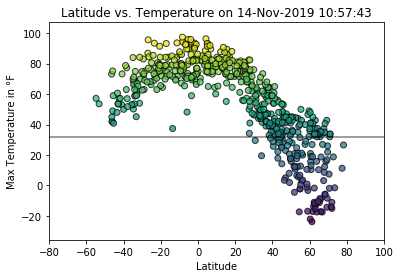

In [15]:
# Set x- and y values
x_values = my_df['Latitude']
y_values = my_df['Max Temperature']

# Create scatter plot
plt.scatter(x_values, y_values, marker="o", c=y_values, edgecolors="black", alpha=0.75)
plt.xlim(-80,100)
plt.ylim(min(my_df['Max Temperature'])*1.5, max(my_df['Max Temperature'])*1.1)

plt.title(f"Latitude vs. Temperature on {Current_Date}")
plt.hlines(32, -80, 100, alpha=.5) # Freezing point
plt.xlabel("Latitude")
plt.ylabel("Max Temperature in °F")

#### Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity in %')

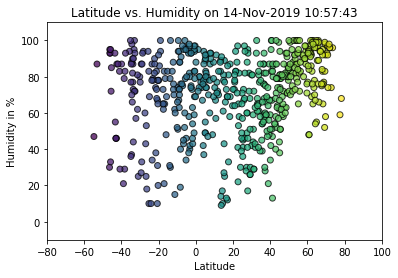

In [6]:
# Set x- and y values
x_values = my_df['Latitude']
y_values = my_df['Humidity']

# Create scatter plot
plt.scatter(x_values, y_values, marker="o", c=x_values, edgecolors="black", alpha=0.75)
plt.xlim(-80,100)
plt.ylim(-10, max(my_df['Humidity'])*1.1)

plt.title(f"Latitude vs. Humidity on {Current_Date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity in %")

#### Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness in %')

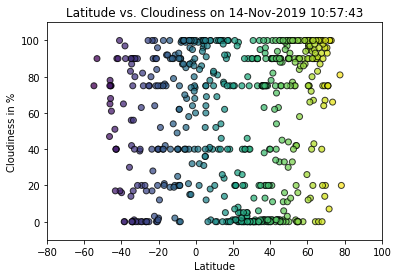

In [7]:
# Set x- and y values
x_values = my_df['Latitude']
y_values = my_df['Cloudiness']

# Create scatter plot
plt.scatter(x_values, y_values, marker="o", c=x_values, edgecolors="black", alpha=0.75)
plt.xlim(-80,100)
plt.ylim(-10, max(my_df['Cloudiness'])*1.1)

plt.title(f"Latitude vs. Cloudiness on {Current_Date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness in %")

#### Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mph)')

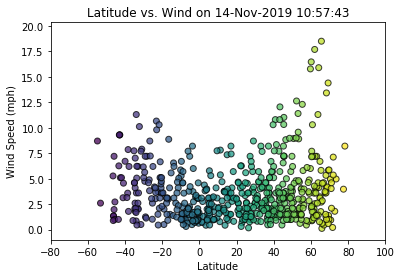

In [8]:
# Set x- and y values
x_values = my_df['Latitude']
y_values = my_df['Wind']
 
# Create scatter plot    
plt.scatter(x_values, y_values, marker="o", c=x_values, edgecolors="black", alpha=0.75)
plt.xlim(-80,100)
plt.ylim(-1, max(my_df['Wind'])*1.1)

plt.title(f"Latitude vs. Wind on {Current_Date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Conclusions

Temperatures spike around the equator(Latitude is 0 degrees) and drop steadily towards the northern and southern hemisphere. It's obviously summer on the southern half, with no max temperatures below freezing. Many countries above 40 degree latitude are dealing with freezing temperatures day and night.

Overall the humitidy is currently higher in the cities in the most northern hemisphere, compared to those on the sourthern half. Since the cities for this research were picked randomly, it also appear there are far more cities on the northern half than the southern half of the globe.

There's a big spike in windspeed towards the northpole (Latitude over 60 degrees). I also increases when moving south, but there appear to be no or very few cities below -60 degrees latitude.